**DODDA SHIVA KUMAR**

#**Project 2:Diabetic_retinopathy_prediction:**



**Importing the dataset:**

In [1]:
#importing the libararies to read the dataset
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('pronostico_dataset.csv',sep=';')
df

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [3]:
#checking for the shape of dataset
df.shape

(6000, 6)

In [4]:
#checking for more info in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [5]:
#checking for basic static info
df.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


# **Exploratory Data Analysis:**

**Data cleaning:**

In [6]:
#checking for duplicate values inthe dataset
df.duplicated().sum()

0

In [7]:
#checking for the null values inthe dataset
df.isnull().sum()

,0
ID,0
age,0
systolic_bp,0
diastolic_bp,0
cholesterol,0
prognosis,0


In [8]:
#Finding outliers and treating them in the dataset
df1=df.copy()    #copying the df into df1
def treat_outliers_with_median(df1,col):
#calculate the first and third quartiles(Q1&Q3)
  Q1=df1[col].quantile(0.25)
  Q3=df1[col].quantile(0.75)
#calculate the IQR
  IQR=Q3-Q1   # calculating the interquartile range(IQR)
  lower_limit=Q1-(1.5*IQR)
  upper_limit=Q3+(1.5*IQR)
  outliers=df1[(df1[col]<lower_limit) | (df1[col]>upper_limit)]
  median_value=df1[col].median()
  df1_treated=df1.copy()
  df1_treated.loc[outliers.index,col]=median_value
  return df1_treated
# Iterate through numeric columns using select_dtypes
for columns in df1.select_dtypes(include=np.number).columns:
    df1_treated=treat_outliers_with_median(df1,columns)
print("shape of the datafarme without outliers:",df1_treated.shape)

shape of the datafarme without outliers: (6000, 6)


**Data visualization:**

In [9]:
#importing the required libraries for visualization
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Figure size 1000x1000 with 0 Axes>

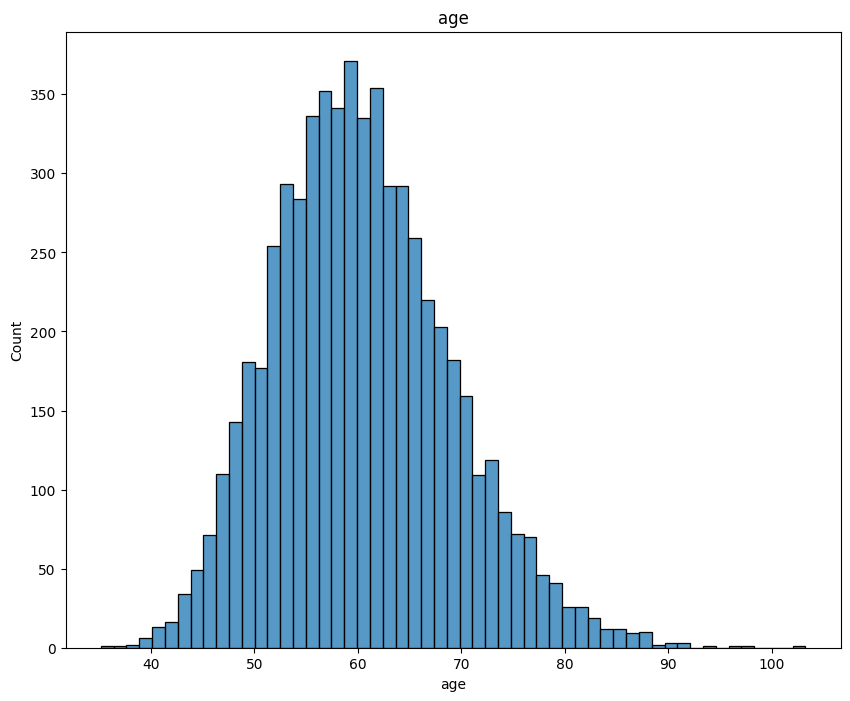

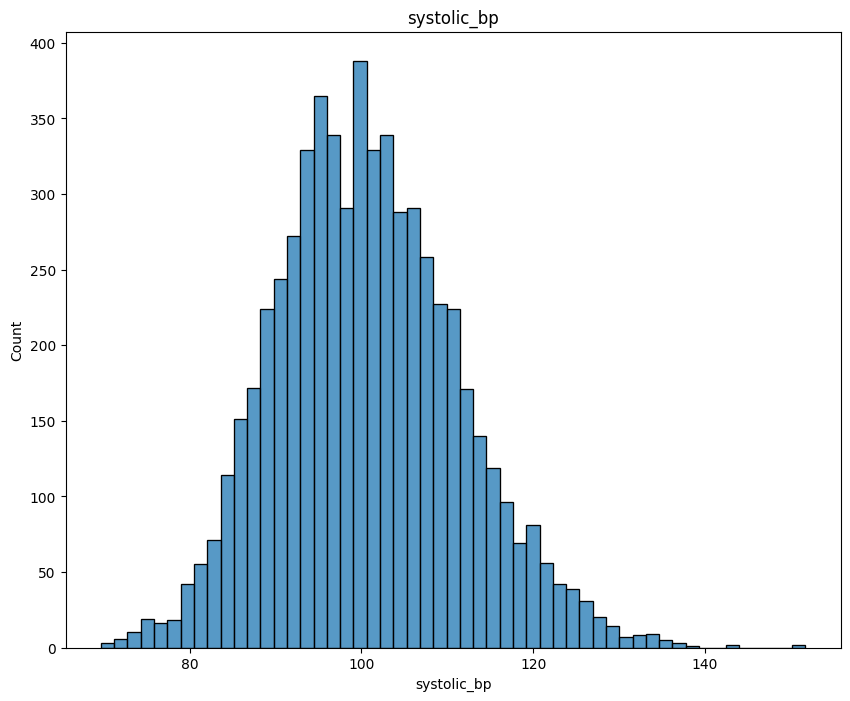

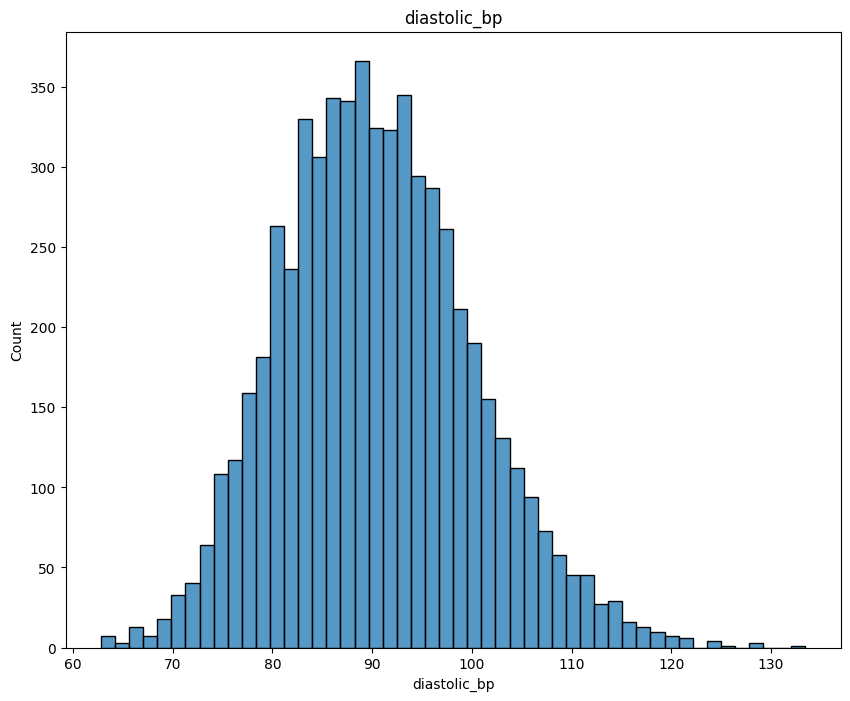

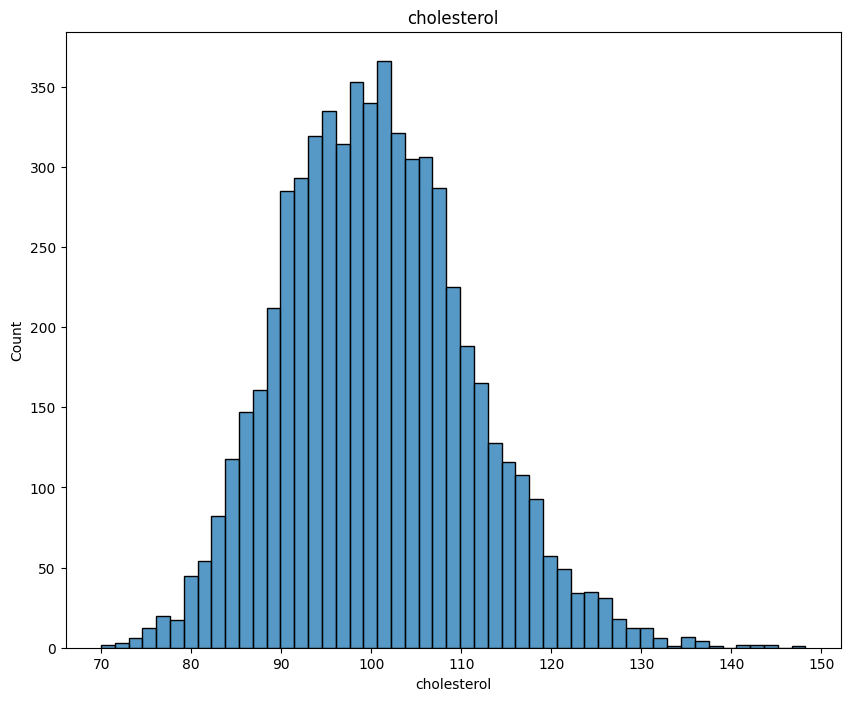

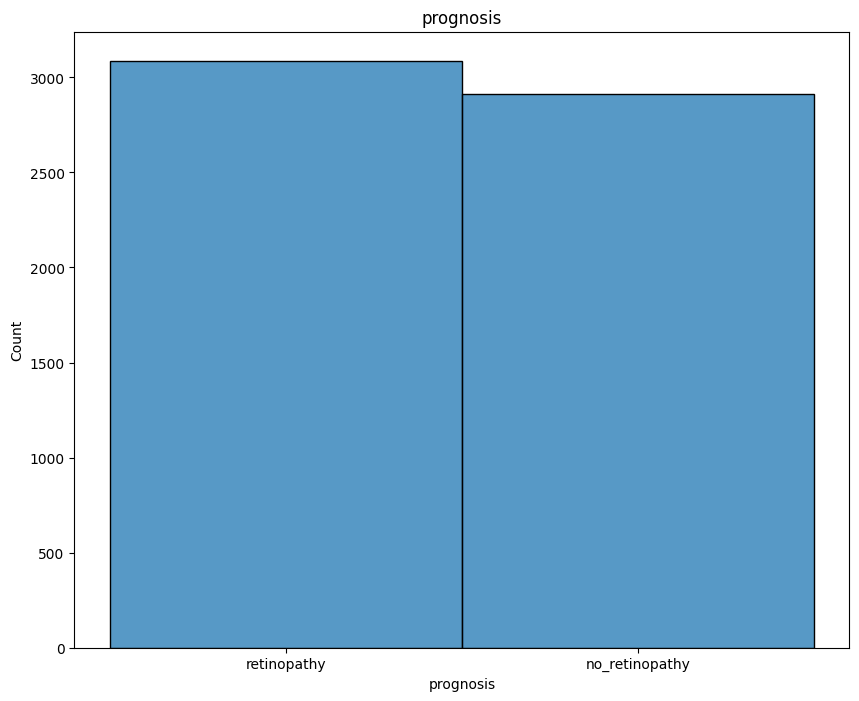

In [10]:
#visualization of the Histogarm for the given dataset
df2=df1_treated.copy()
df2 = df2.drop('ID', axis=1) # Corrected line: drop the 'ID' column
plt.figure(figsize=(10,10)) # Now using plt
for columns in df2.columns:
    plt.figure(figsize=(10,8))
    sns.histplot(df[columns])
    plt.title(columns)
    plt.show()

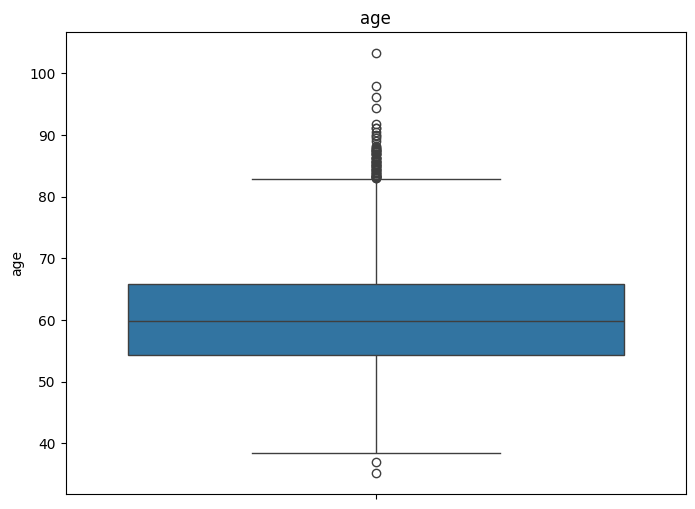

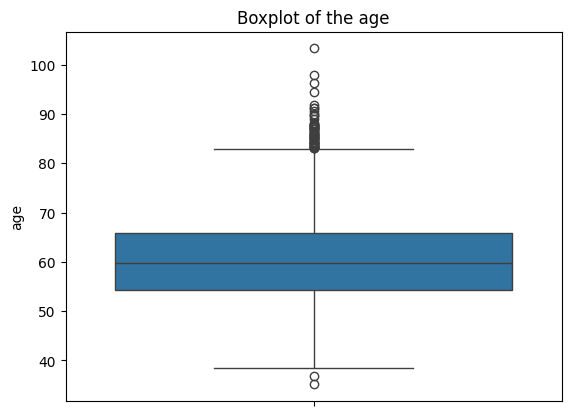

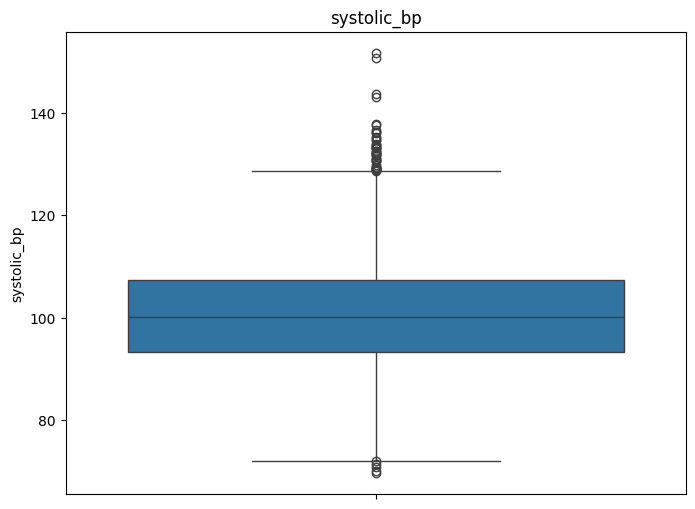

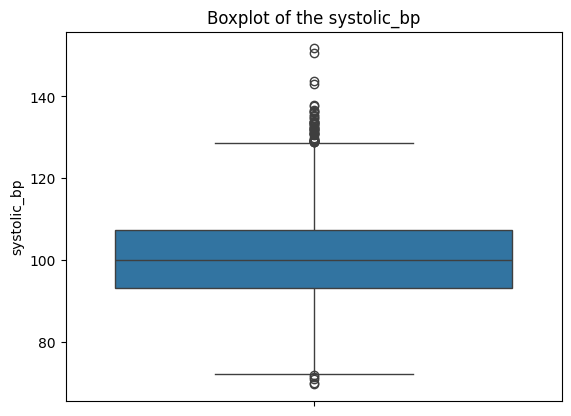

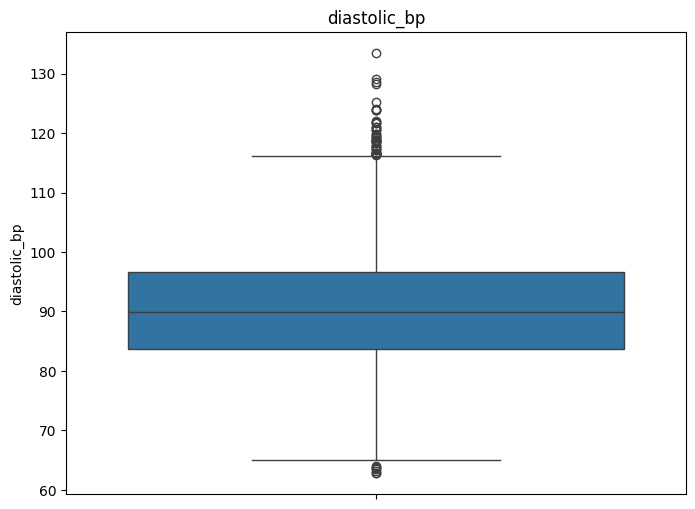

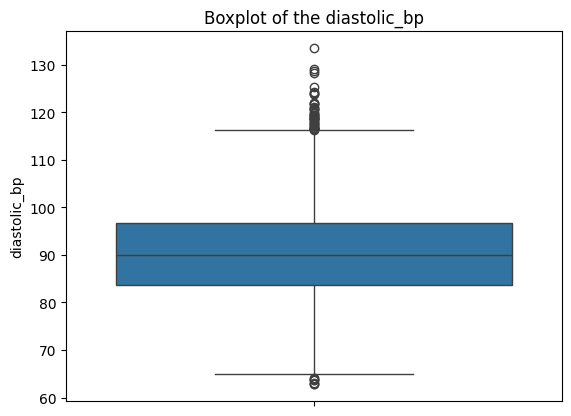

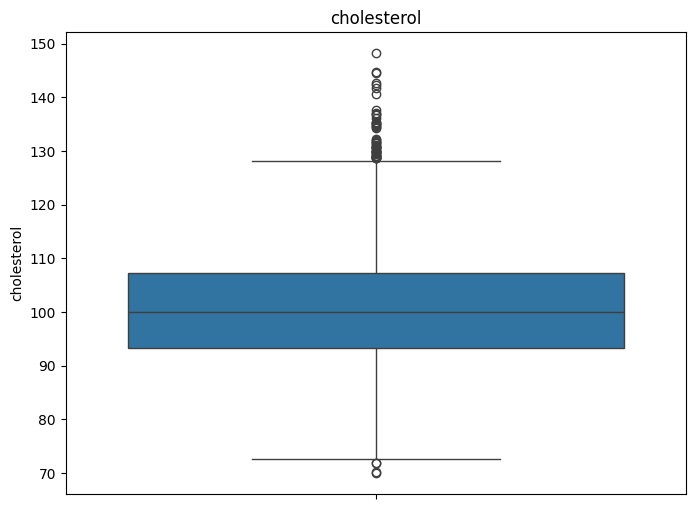

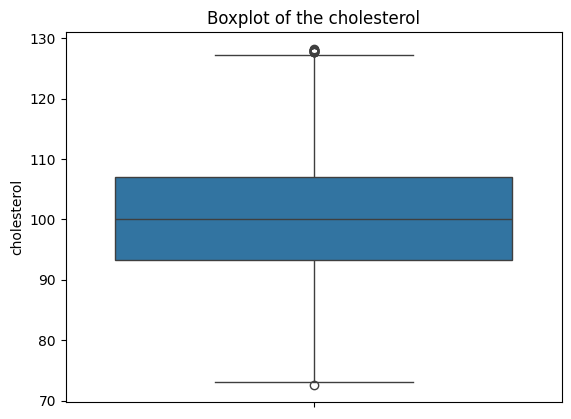

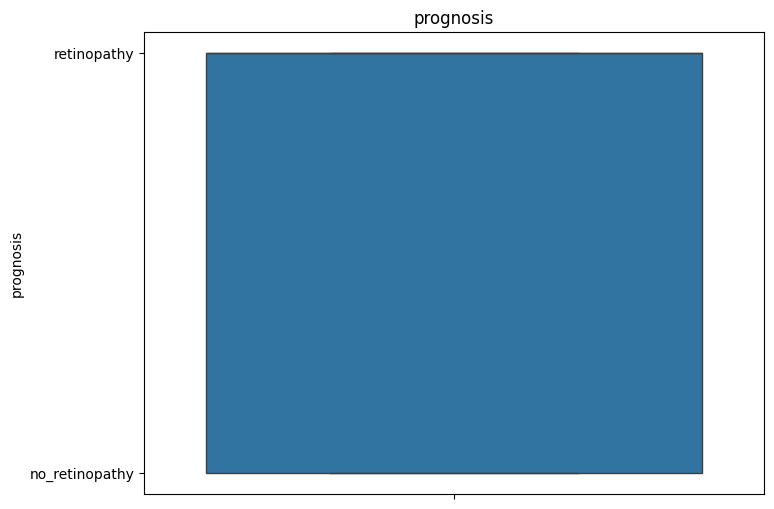

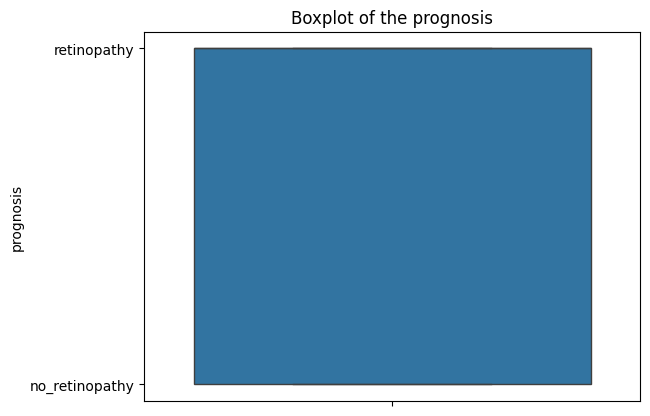

In [11]:
#visualization of the boxplot
for columns in df2.columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(y=df[columns])
  plt.title(columns)
  plt.show()
  sns.boxplot(df2[columns],vert=True)
  plt.title(f"Boxplot of the {columns}")


**Data Transformation**

In [12]:
#converting the catgorical columns into numericals by using one-hot Encoding

from sklearn.preprocessing import LabelEncoder

# Instead of using 'prognosis' as a data type, select it by name:
categorical_cols = df2.columns[df2.columns.isin(['prognosis'])]

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for col in categorical_cols:
    df2[col] = label_encoder.fit_transform(df2[col])

# Now 'df' contains label-encoded categorical features
print(df2)

            age  systolic_bp  diastolic_bp  cholesterol  prognosis
0     77.196340    85.288742     80.021878    79.957109          1
1     63.529850    99.379736     84.852361   110.382411          1
2     69.003986   111.349455    109.850616   100.828246          1
3     82.638210    95.056128     79.666851    87.066303          1
4     78.346286   109.154591     90.713220    92.511770          1
...         ...          ...           ...          ...        ...
5995  49.611850    94.857639     86.615671   107.643986          0
5996  63.099686   100.039527     93.515186   104.971404          1
5997  55.562243    98.421446    102.697875   120.875951          1
5998  63.468956   106.809289     88.060631   106.052213          1
5999  62.506825    96.900784     86.878033   108.625436          0

[6000 rows x 5 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

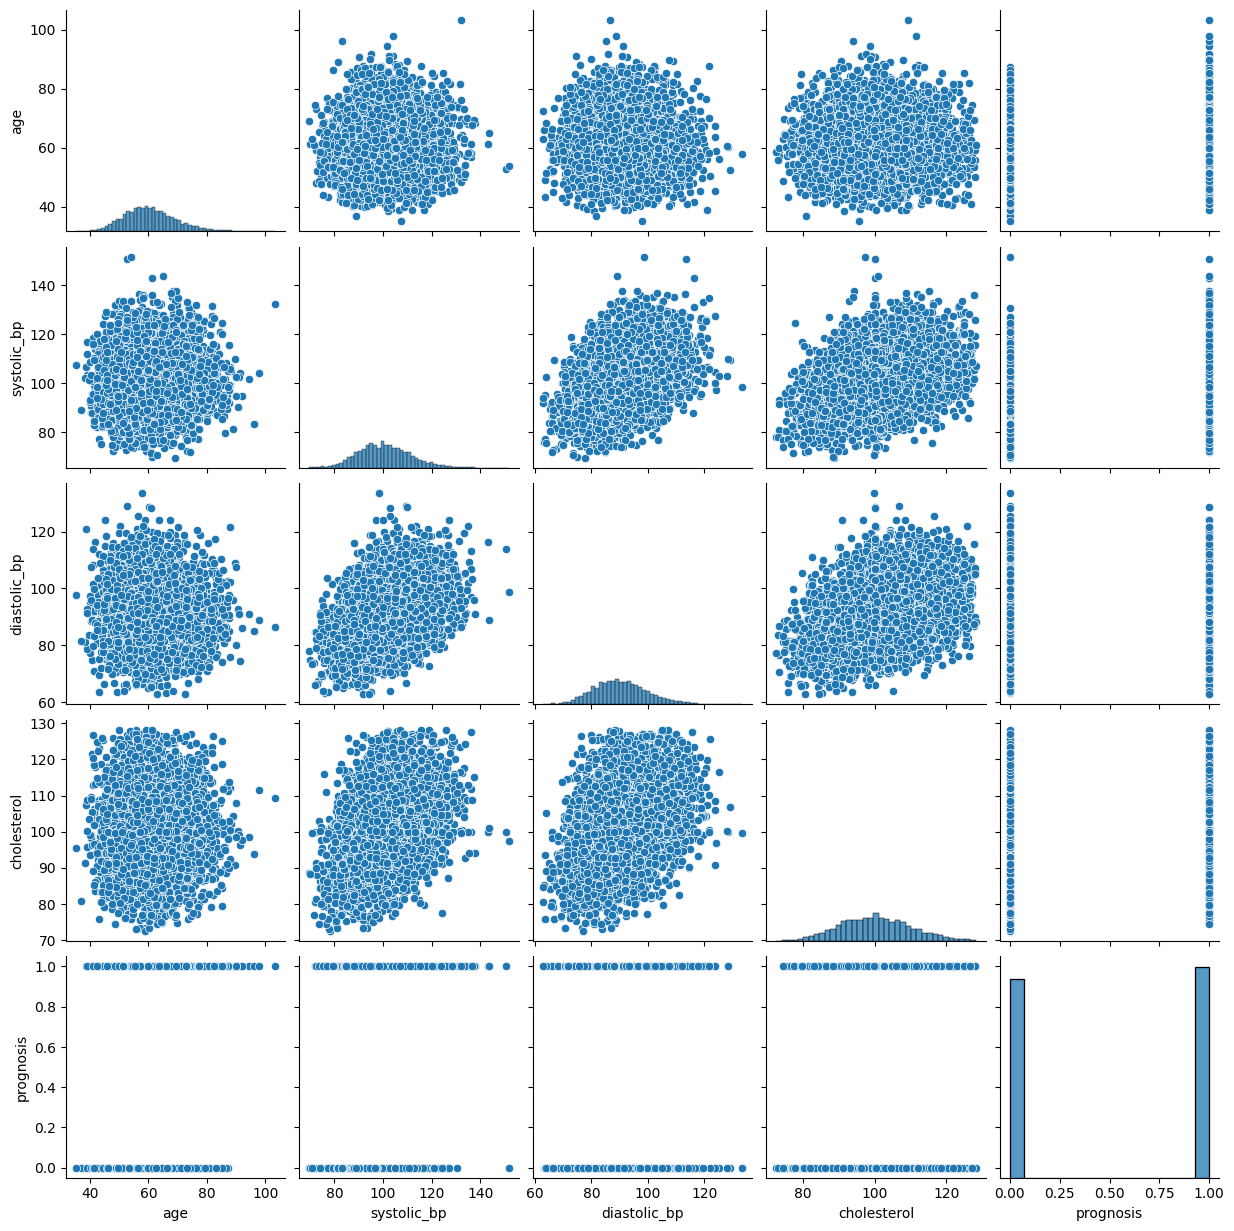

In [13]:
#visualatization of pairplot
plt.figure(figsize=(10,10))
sns.pairplot(df2)
plt.show

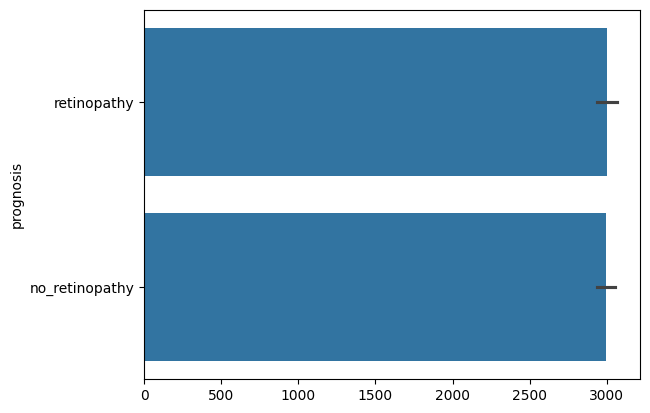

In [14]:
#visualtization of barplots for catagorical columns
sns.barplot(df1['prognosis'])
plt.show()

**Data Transformation**

In [15]:
df_prognosis=df2["prognosis"]   #storing df2["prognosis"] in df_prognosis

In [16]:
#normalizaation of the dataset,Range [0,1]:
from sklearn.preprocessing import MinMaxScaler     #minmaxScaler libraries is used for normilization range[0 to 1]
scaler=MinMaxScaler()
df3=scaler.fit_transform(df2.iloc[:,[0,1,2,3]])
df3=pd.DataFrame(df3)
df3.columns=list(df2.iloc[:,[0,1,2,3]])
df3

,age,systolic_bp,diastolic_bp,cholesterol
0,0.617070,0.190350,0.243665,0.133113
1,0.416431,0.362141,0.312038,0.679847
2,0.496797,0.508070,0.665874,0.508161
3,0.696963,0.309429,0.238640,0.260863
4,0.633953,0.481311,0.394995,0.358717
...,...,...,...,...
5995,0.212099,0.307009,0.336997,0.630638
5996,0.410116,0.370184,0.434655,0.582613
5997,0.299458,0.350458,0.564631,0.868413
5998,0.415537,0.452718,0.357449,0.602035


In [17]:
#concatation of the df3,df_age and df_prognosis
df4=pd.concat([df3,df_prognosis],axis=1)
df4

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0.617070,0.190350,0.243665,0.133113,1
1,0.416431,0.362141,0.312038,0.679847,1
2,0.496797,0.508070,0.665874,0.508161,1
3,0.696963,0.309429,0.238640,0.260863,1
4,0.633953,0.481311,0.394995,0.358717,1
...,...,...,...,...,...
5995,0.212099,0.307009,0.336997,0.630638,0
5996,0.410116,0.370184,0.434655,0.582613,1
5997,0.299458,0.350458,0.564631,0.868413,1
5998,0.415537,0.452718,0.357449,0.602035,1


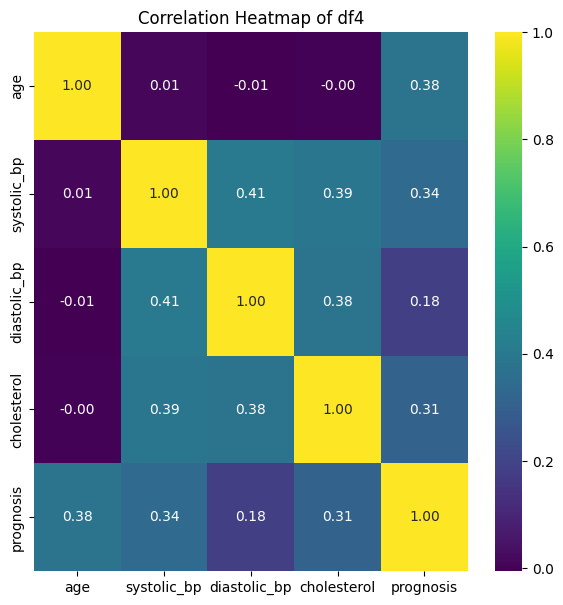

In [18]:
# Calculate the correlation matrix
correlation_matrix = df4.corr()

# Create the heatmap
plt.figure(figsize=(7,7))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of df4')
plt.show()

In [19]:
#checking for mulitycolinearity issue
# calculate vif of all columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df4.columns
vif_data["VIF"] = [variance_inflation_factor(df4.values, i) for i in range(len(df4.columns))]

vif_data

,feature,VIF
0,age,6.611760
1,systolic_bp,11.519418
2,diastolic_bp,10.906860
3,cholesterol,10.370048
4,prognosis,2.599433


#**Data Partition :** **Splitting the data (train,test)**

In [20]:
#spliting of the dataset to train and test data

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (Y)
X =df4[["age","systolic_bp","diastolic_bp","cholesterol"]]
Y = df4['prognosis']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#**Model building:**

**1.Logistic Regression Model:**

In [21]:
#Building Logistic Regression Model for given dataset
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = log_reg.predict(X_test)

# Evaluate the model (example: using accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy of Logistic Regression: {accuracy}")

Test Accuracy of Logistic Regression: 0.7425


In [22]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 20, 50],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga'],  # Optimization solvers
    'max_iter': [100, 200, 300]  # Iteration limits
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Access the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train a Logistic Regression model with the best parameters
best_classifier = LogisticRegression(**best_params)
best_classifier.fit(X_train, Y_train)

# Perform cross-validation on the training set
cv_scores = cross_val_score(best_classifier, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Evaluate the model on the test set
Y_test_pred = best_classifier.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report on Test Set:")
print(classification_report(Y_test, Y_test_pred))


Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Cross-Validation Accuracy: 0.74 ± 0.01
Test Accuracy: 0.74

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       575
           1       0.76      0.74      0.75       625

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200



**2.Decision Tree Model:**

In [23]:
#BUilding Decision Tress model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Grid Search for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],  # Split quality metric
    'max_depth': [5, 10, 20, None],   # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, Y_train)

# Best Decision Tree model
best_dt = dt_grid_search.best_estimator_
print(f"Best Decision Tree Parameters: {dt_grid_search.best_params_}")

# Predictions and evaluation for Decision Tree
dt_Y_pred = best_dt.predict(X_test)
print("\nDecision Tree Performance:")
print(f"Accuracy: {accuracy_score(Y_test, dt_Y_pred):.2f}")
print(classification_report(Y_test, dt_Y_pred))


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}

Decision Tree Performance:
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       575
           1       0.77      0.71      0.74       625

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200



**3.Random Forest Model:**

In [24]:
#Building random forest model to given dataset

from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target variable (Y)
X =df4[["age","systolic_bp","diastolic_bp","cholesterol"]]
Y = df4['prognosis']

# Split data into training and testing sets
X_train,X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42)
# Initialize and train the Random Forest Regressor
model3 = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
model3.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_model3 = model3.predict(X_test)

# Assign model3 to best_rf
best_rf = model3

# Predictions and evaluation for Random Forest
rf_Y_pred = best_rf.predict(X_test)
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(Y_test, rf_Y_pred):.2f}")
print(classification_report(Y_test, rf_Y_pred))



Random Forest Performance:
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       575
           1       0.74      0.76      0.75       625

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200



**4.KNN Model:**

In [25]:
#Building knn model by using given data X and Y

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a GridSearchCV object for KNN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_knn.fit(X_train, Y_train)

# Get the best KNN model
best_knn = grid_search_knn.best_estimator_
print(f"Best KNN Parameters: {grid_search_knn.best_params_}")


# Make predictions
knn_Y_pred = best_knn.predict(X_test)

# Evaluate the model
print("\nKNN Performance:")  # Changed the title to "KNN Performance"
print(f"Accuracy: {accuracy_score(Y_test, knn_Y_pred):.2f}")
print(classification_report(Y_test, knn_Y_pred))

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

KNN Performance:
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       575
           1       0.74      0.76      0.75       625

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200



**5.Support Vector Machine:**

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10,20,30,50, 100],       # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto'],   # Kernel coefficient
}

# Create a GridSearchCV object for SVM
svm_grid_search = GridSearchCV(SVC(), param_grid=svm_param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
svm_grid_search.fit(X_train, Y_train)

# Best SVM model
best_svm = svm_grid_search.best_estimator_
print(f"Best SVM Parameters: {svm_grid_search.best_params_}")

# Predictions and evaluation for SVM
svm_Y_pred = best_svm.predict(X_test)

# Evaluate the SVM model
print("\nSVM Performance:")
print(f"Accuracy: {accuracy_score(Y_test, svm_Y_pred):.2f}")
print(classification_report(Y_test, svm_Y_pred))


Best SVM Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

SVM Performance:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       575
           1       0.76      0.76      0.76       625

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



**6.LightGBM and XGBOOSTING:**

In [27]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter grid for LightGBM
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7, -1],  # Depth of tree (-1 for no limit)
    'num_leaves': [31, 50, 100]  # Number of leaves
}

# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Depth of tree
    'gamma': [0, 0.1, 0.5],  # Minimum loss reduction
    'subsample': [0.8, 1.0],  # Fraction of samples used per tree
}

# GridSearchCV for LightGBM
lgbm_grid_search = GridSearchCV(LGBMClassifier(random_state=42), param_grid=lgbm_param_grid, cv=5, scoring='accuracy')
lgbm_grid_search.fit(X_train, Y_train)

# Best LightGBM model
best_lgbm = lgbm_grid_search.best_estimator_
print(f"Best LightGBM Parameters: {lgbm_grid_search.best_params_}")

# Predictions and evaluation for LightGBM
lgbm_Y_pred = best_lgbm.predict(X_test)
print("\nLightGBM Performance:")
print(f"Accuracy: {accuracy_score(Y_test, lgbm_Y_pred):.2f}")
print(classification_report(Y_test, lgbm_Y_pred))



Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [28]:
# XGBM
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, Y_train.values.ravel())

# Predictions
Y_pred = xgb_clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       575
           1       0.72      0.73      0.73       625

    accuracy                           0.71      1200
   macro avg       0.71      0.71      0.71      1200
weighted avg       0.71      0.71      0.71      1200



# **pytorch**

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Drop ID column and extract features & target
X = df.drop(columns=["ID", "prognosis"])
y = df["prognosis"]

In [30]:
# Encode labels (e.g., 'retinopathy' -> 0, 'other_class' -> 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [31]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)  # LongTensor for classification

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [32]:
# Custom Dataset class
class HealthDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create training and testing datasets
train_dataset = HealthDataset(X_train, y_train)
test_dataset = HealthDataset(X_test, y_test)

In [33]:
# Hyperparameters
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 20

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [34]:
# Define Neural Network Model
class HealthClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(HealthClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # Increased neurons
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)  # No softmax needed (CrossEntropyLoss handles it)
        return x


In [35]:
# Initialize model, loss, and optimizer
input_dim = X.shape[1]
num_classes = len(label_encoder.classes_)
model = HealthClassifier(input_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


In [36]:
# Training Loop
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {total_loss/len(train_loader):.4f}")

Epoch [1/20], Loss: 0.7901
Epoch [2/20], Loss: 0.7656
Epoch [3/20], Loss: 0.7003
Epoch [4/20], Loss: 0.7135
Epoch [5/20], Loss: 0.6896
Epoch [6/20], Loss: 0.6954
Epoch [7/20], Loss: 0.6945
Epoch [8/20], Loss: 0.6808
Epoch [9/20], Loss: 0.6836
Epoch [10/20], Loss: 0.6836
Epoch [11/20], Loss: 0.6732
Epoch [12/20], Loss: 0.6646
Epoch [13/20], Loss: 0.6649
Epoch [14/20], Loss: 0.6651
Epoch [15/20], Loss: 0.6672
Epoch [16/20], Loss: 0.6636
Epoch [17/20], Loss: 0.6620
Epoch [18/20], Loss: 0.6580
Epoch [19/20], Loss: 0.6590
Epoch [20/20], Loss: 0.6576


In [37]:
# Evaluation
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        correct += (predictions == batch_y).sum().item()
        total += batch_y.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 61.92%


In [38]:
import itertools

# Define possible hyperparameter values
learning_rates = [0.01, 0.001, 0.0005]
batch_sizes = [16, 32, 64]
hidden_layers = [(128, 64), (256, 128), (512, 256)]  # More neurons per layer

# Get all combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(learning_rates, batch_sizes, hidden_layers))

best_acc = 0
best_params = None

for lr, batch_size, (hidden1, hidden2) in hyperparameter_combinations:
    print(f"\nTesting Hyperparameters: LR={lr}, Batch Size={batch_size}, Layers=({hidden1}, {hidden2})")

    # Update DataLoader with new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Define model with updated architecture
    class TunedHealthClassifier(nn.Module):
        def __init__(self, input_dim, num_classes):
            super(TunedHealthClassifier, self).__init__()
            self.fc1 = nn.Linear(input_dim, hidden1)
            self.relu1 = nn.ReLU()
            self.fc2 = nn.Linear(hidden1, hidden2)
            self.relu2 = nn.ReLU()
            self.fc3 = nn.Linear(hidden2, num_classes)

        def forward(self, x):
            x = self.fc1(x)
            x = self.relu1(x)
            x = self.fc2(x)
            x = self.relu2(x)
            x = self.fc3(x)
            return x

    # Initialize model
    model = TunedHealthClassifier(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5)

    # Train the model
    for epoch in range(15):  # Reduced epochs for tuning
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/15], Loss: {total_loss/len(train_loader):.4f}")

    # Evaluate accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            predictions = torch.argmax(outputs, dim=1)
            correct += (predictions == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Track best model
    if accuracy > best_acc:
        best_acc = accuracy
        best_params = (lr, batch_size, hidden1, hidden2)

print(f"\nBest Model -> LR={best_params[0]}, Batch Size={best_params[1]}, Layers=({best_params[2]}, {best_params[3]}), Accuracy={best_acc:.2f}")



Testing Hyperparameters: LR=0.01, Batch Size=16, Layers=(128, 64)
Epoch [1/15], Loss: 0.9057
Epoch [2/15], Loss: 0.6934
Epoch [3/15], Loss: 0.6938
Epoch [4/15], Loss: 0.6930
Epoch [5/15], Loss: 0.6935
Epoch [6/15], Loss: 0.6933
Epoch [7/15], Loss: 0.6937
Epoch [8/15], Loss: 0.6932
Epoch [9/15], Loss: 0.6934
Epoch [10/15], Loss: 0.6938
Epoch [11/15], Loss: 0.6933
Epoch [12/15], Loss: 0.6935
Epoch [13/15], Loss: 0.6936
Epoch [14/15], Loss: 0.6933
Epoch [15/15], Loss: 0.6939
Test Accuracy: 52.08%

Testing Hyperparameters: LR=0.01, Batch Size=16, Layers=(256, 128)
Epoch [1/15], Loss: 1.4844
Epoch [2/15], Loss: 0.6922
Epoch [3/15], Loss: 0.6652
Epoch [4/15], Loss: 0.6702
Epoch [5/15], Loss: 0.6615
Epoch [6/15], Loss: 0.6492
Epoch [7/15], Loss: 0.6514
Epoch [8/15], Loss: 0.6383
Epoch [9/15], Loss: 0.6369
Epoch [10/15], Loss: 0.6279
Epoch [11/15], Loss: 0.6198
Epoch [12/15], Loss: 0.6181
Epoch [13/15], Loss: 0.6097
Epoch [14/15], Loss: 0.6209
Epoch [15/15], Loss: 0.6099
Test Accuracy: 62.08%

**Comparing of metrics of all models:**

In [42]:
#compare the metrics of accuracy and precision,recall,f1-score for all models and visualizing in table form

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': (Y_test, Y_test_pred),  # Assuming Y_test_pred is defined
    'Decision Tree': (Y_test, dt_Y_pred),
    'Random Forest': (Y_test, rf_Y_pred),
    'KNN': (Y_test, knn_Y_pred),
    'SVM': (Y_test, svm_Y_pred),
    'LightGBM': (Y_test, lgbm_Y_pred),
    'XGBoost': (Y_test, Y_pred), # Assuming Y_pred is from XGBoost
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score,
}

results = []
for model_name, (y_true, y_pred) in models.items():
    model_metrics = {}
    model_metrics['Model'] = model_name
    for metric_name, metric_func in metrics.items():
      try:
        if metric_name == 'Accuracy':
          score = metric_func(y_true, y_pred)
        else:
          score = metric_func(y_true, y_pred, average='weighted') # Use 'weighted' average for multi-class
        model_metrics[metric_name] = score
      except ValueError as e: # Handle potential errors like when a label doesn't exist in the prediction
        print(f"Error calculating {metric_name} for {model_name}: {e}. Setting score to NaN")
        model_metrics[metric_name] = np.nan
    results.append(model_metrics)

metrics_df = pd.DataFrame(results)
metrics_df


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.741667,0.742050,0.741667,0.741757
1,Decision Tree,0.739167,0.741329,0.739167,0.739207
2,Random Forest,0.735000,0.734870,0.735000,0.734835
3,KNN,0.740000,0.739890,0.740000,0.739778
4,SVM,0.747500,0.747453,0.747500,0.747472
5,LightGBM,0.742500,0.742427,0.742500,0.742451
6,XGBoost,0.711667,0.711501,0.711667,0.711487
